In [25]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
data = pd.read_csv("weatherAUS.csv")
X_0 = data.iloc[:, :-2]
y_0 = data.iloc[:, -1]


In [27]:
X_0.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... WindSpeed9am  WindSpeed3pm  \
0           W           44.0          W  ...         20.0          24.0   
1         WNW           44.0        NNW  ...          4.0          22.0   
2         WSW           46.0          W  ...         19.0          26.0   
3          NE           24.0         SE  ...         11.0           9.0   
4           W           41.0        ENE  ...          7.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         71.0         22.0       1007.7       1007.1       8.0       NaN   
1         44.0         25.0       1010.6       1007.8       NaN       NaN   
2         38.0         30.0       1007.6       1008.7       NaN       2.0   
3         45.0         16.0       1017.6       1012.8       NaN       NaN   
4         82.0         33.0       1010.8       1006.0       7.0       8.0   

   Temp9am  Temp3pm  
0     16.9     21.8  
1     17.2     24.3  
2     21.0     23.2  
3     18.1     26.5  
4     17.8     29.7  

[5 rows x 21 columns]

In [28]:
X_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

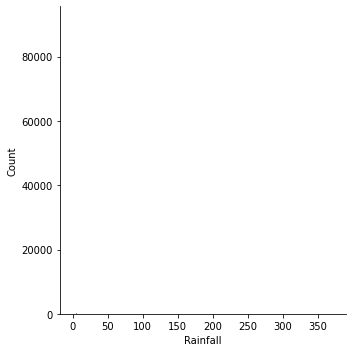

In [29]:
i = "Rainfall"
sns.displot( X_0[i], legend=i)

In [30]:
np.unique(X_0["Rainfall"].values, return_counts=True)

(array([0. , 0.1, 0.2, ..., nan, nan, nan]),
 array([91080,   157,  8761, ...,     1,     1,     1]))

In [31]:
# Удалим Evaporation, Sunshine, Cloud9am, Cloud3pm так как отсутствует порядка 40-50% данных
# Также удалим Rainfall, в большинстве своем (около 90000) находится в районе 0 мм
# Таким образом имеем максимальную потерю в данных около 10%

X = X_0.drop(["Evaporation", "Sunshine", "Cloud9am", "Cloud3pm", "Rainfall"] , axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   WindGustDir    135134 non-null  object 
 5   WindGustSpeed  135197 non-null  float64
 6   WindDir9am     134894 non-null  object 
 7   WindDir3pm     141232 non-null  object 
 8   WindSpeed9am   143693 non-null  float64
 9   WindSpeed3pm   142398 non-null  float64
 10  Humidity9am    142806 non-null  float64
 11  Humidity3pm    140953 non-null  float64
 12  Pressure9am    130395 non-null  float64
 13  Pressure3pm    130432 non-null  float64
 14  Temp9am        143693 non-null  float64
 15  Temp3pm        141851 non-null  float64
dtypes: float64(11), object(5)
memory usage: 17.8+ MB


In [32]:
# В y_start есть некоторые данные, содержащие nan, устраним их. Так как их мало (около 2%) - ущерба несущественен 

data = pd.read_csv("weatherAUS.csv")


print(pd.unique(y_0))
print(pd.value_counts(y_0, dropna=False))

y = y_0[(y_0 == "Yes") | (y_0 == "No")]
y = y.replace(["No", "Yes"], [0, 1])
X = X[(y_0 == "Yes") | (y_0 == "No")]


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle=False)

['No' 'Yes' nan]
No     110316
Yes     31877
NaN      3267
Name: RainTomorrow, dtype: int64


In [33]:
#Данная функция переводит дату в количество дней от 1 января 1970 года
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import copy


def date_to_DayFromStart(X, column = "Date"):
    X_copy = X.copy()
    X_date = X_copy[column].values
    date_ = X_copy[column].apply(datetime.date.fromisoformat)
    return date_.apply(datetime.datetime.toordinal).astype(np.float64)
    


# X["Date"] = date_to_DayFromStart(X, column="Date")


num_pipeline = Pipeline([
    ("missing_values", SimpleImputer(strategy = "mean")),
    ("std_scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("OneHotEncoder", OneHotEncoder())    
])

In [34]:
X_work = X_train.copy()
X_train.loc[:, "Date"] = date_to_DayFromStart(X_work, "Date")
del X_work
numeric_values = (X_train.dtypes == "float64")
# numeric_values[numeric_values == True]
X_numeric = X_train.loc[:, numeric_values]

/home/stepan/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


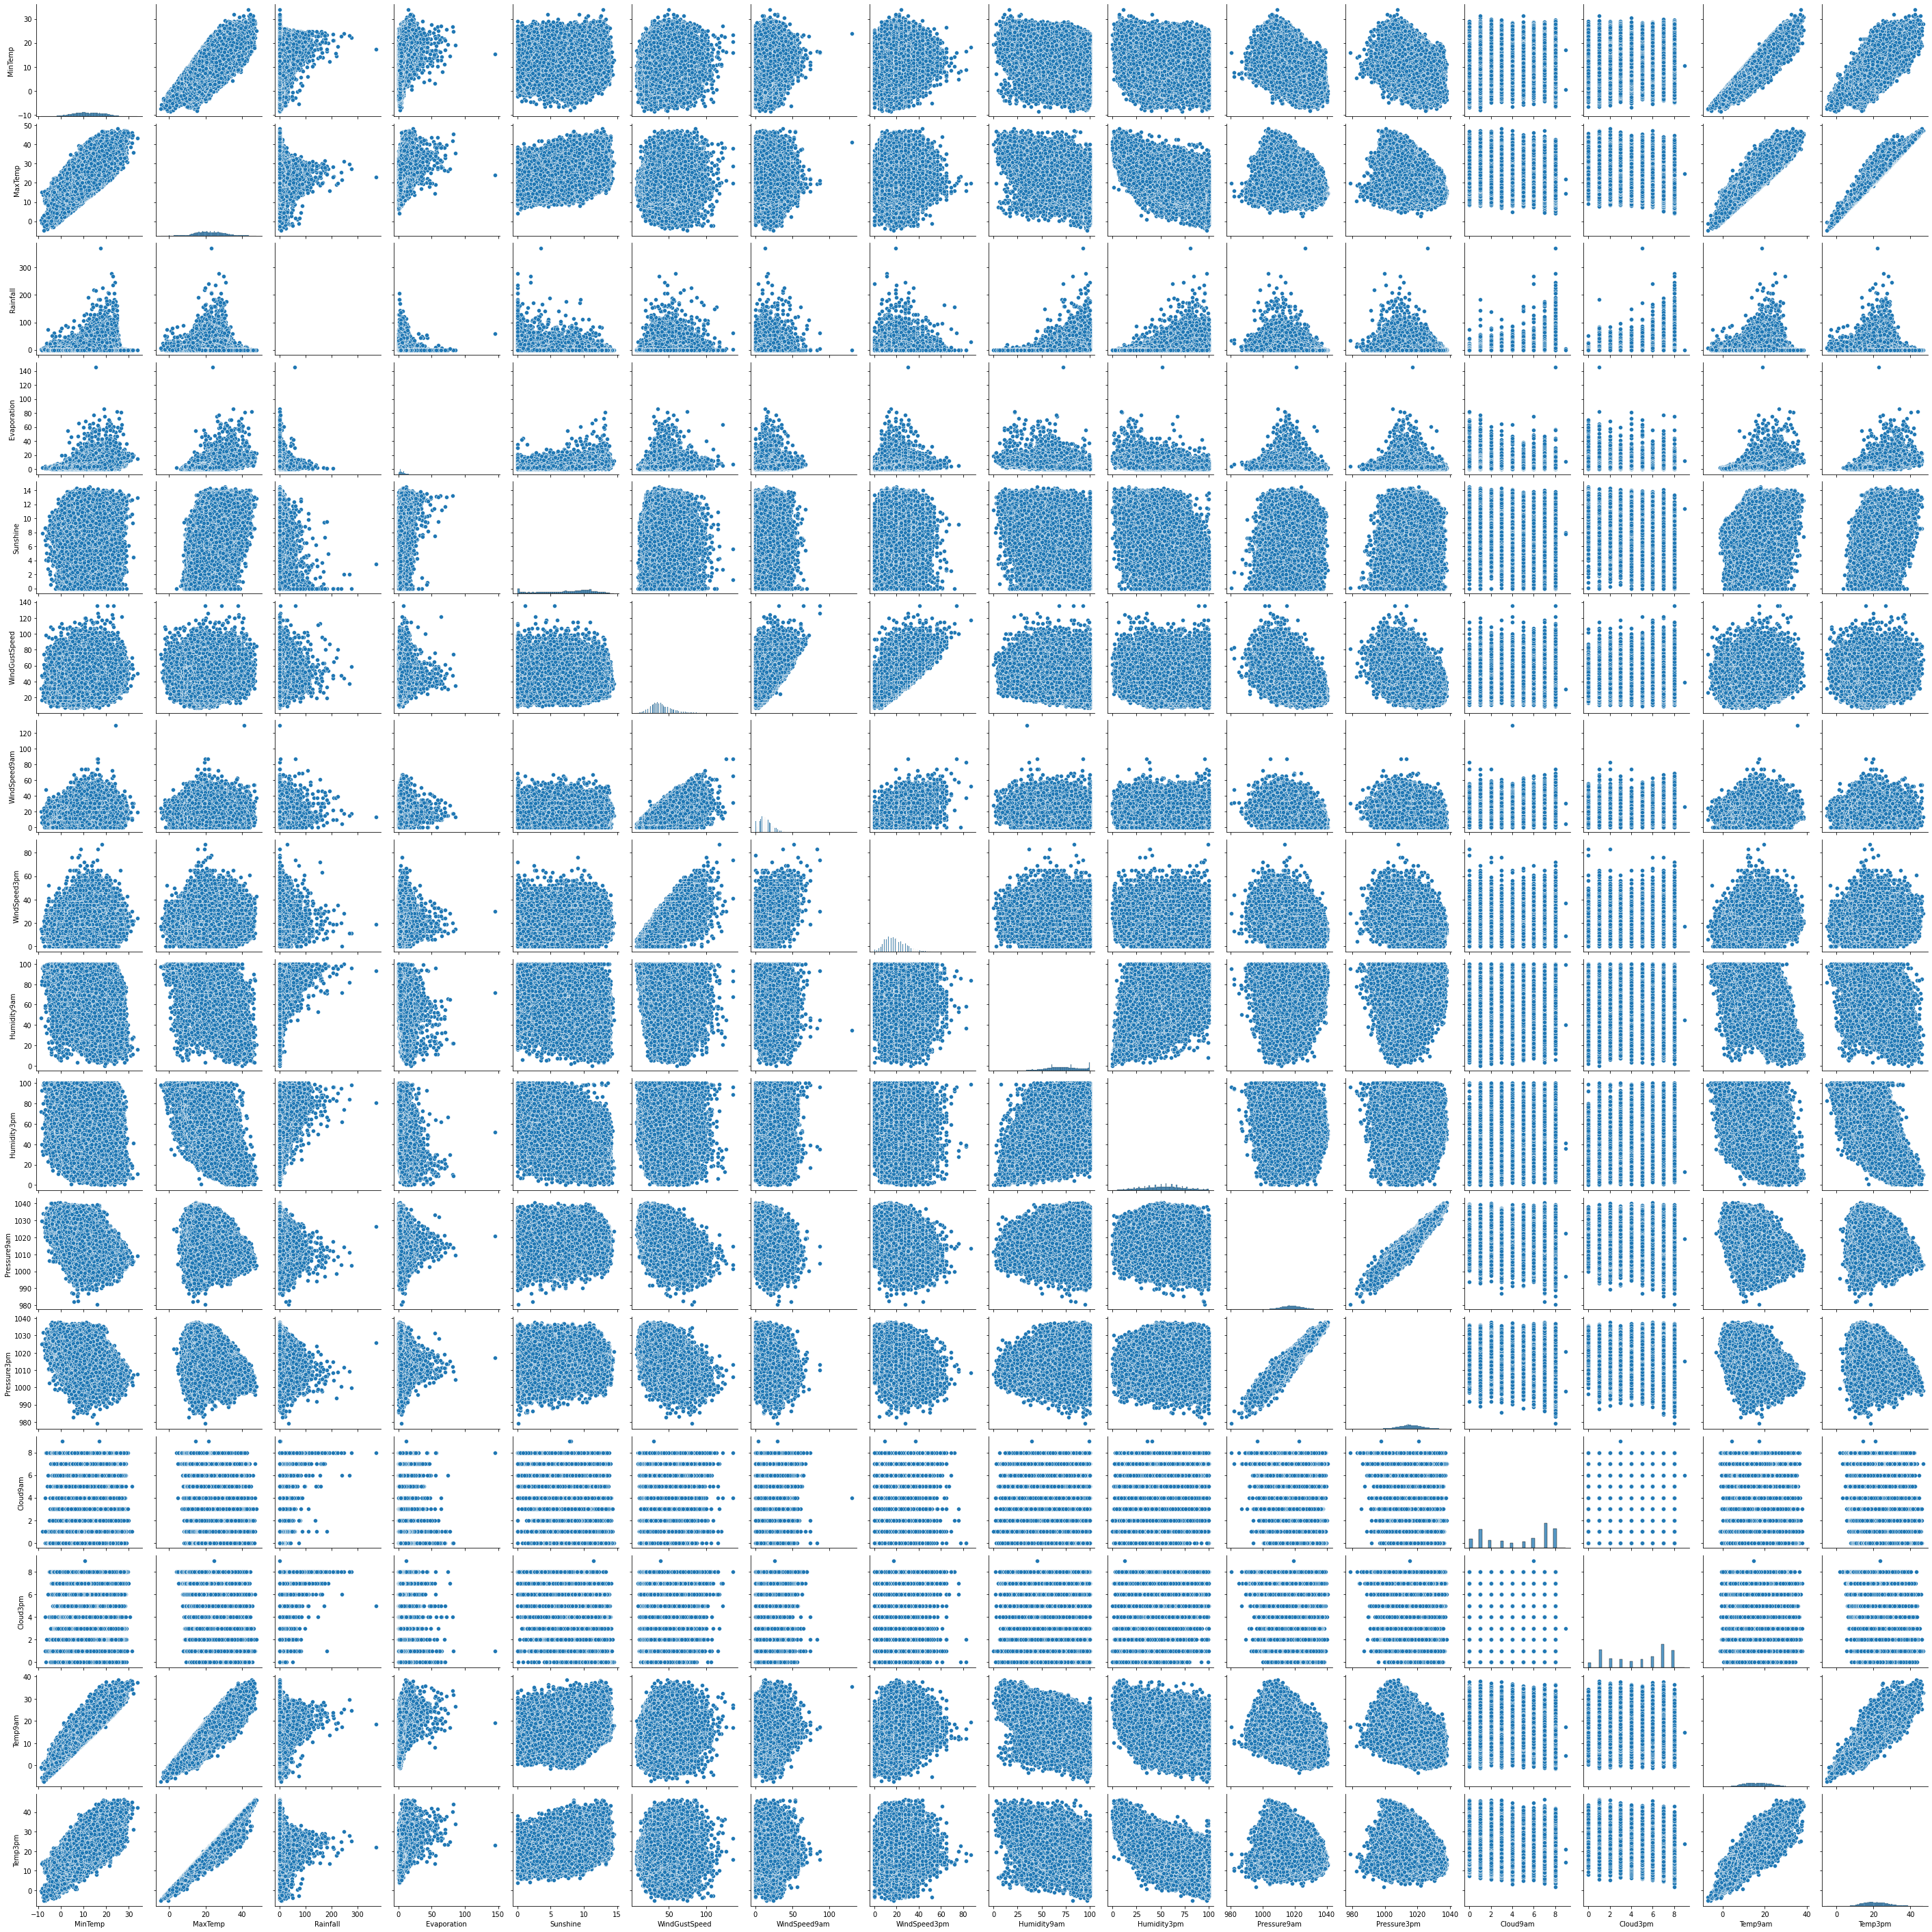

In [69]:
sns.pairplot(X_numeric)

In [35]:
# В данном шаге происходит разделение параметров на объектные и числовые
X_train_num = X_train.loc[:, X_train.dtypes == "float64"]
X_train_cat = X_train.loc[:, X_train.dtypes == "object"]

X_train_num = num_pipeline.fit_transform(X_train_num)


In [36]:
X_train_cat.head()

Location WindGustDir WindDir9am WindDir3pm
0   Albury           W          W        WNW
1   Albury         WNW        NNW        WSW
2   Albury         WSW          W        WSW
3   Albury          NE         SE          E
4   Albury           W        ENE         NW

In [37]:
X_train_num

array([[-1.68693428,  0.22638775,  0.02334681, ..., -1.29989422,
         0.05745044,  0.0814252 ],
       [-1.68585255, -0.71980219,  0.34061698, ..., -1.19403929,
         0.10482432,  0.45374636],
       [-1.68477081,  0.14753859,  0.4271452 , ..., -1.05794009,
         0.70489341,  0.28992505],
       ...,
       [-0.95892654,  0.08445926, -0.71214313, ...,  1.02891428,
        -0.16362765, -0.93128835],
       [-0.9578448 ,  0.08445926, -0.94288507, ...,  2.11770787,
        -0.24258411, -0.84193127],
       [-0.95676307, -0.71980219, -0.40929433, ...,  1.54306681,
        -0.24258411, -0.48450296]])

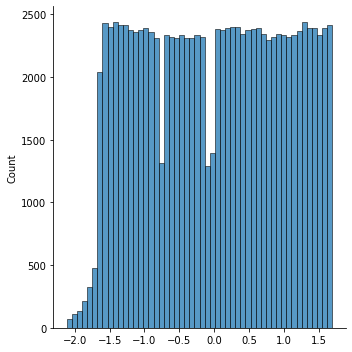

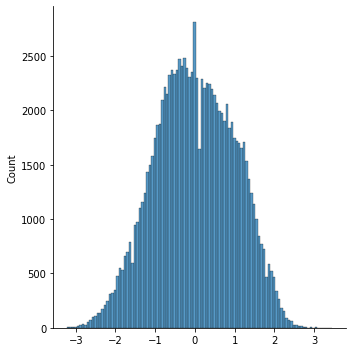

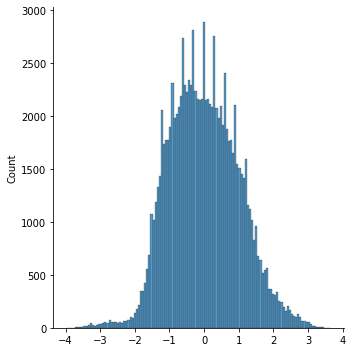

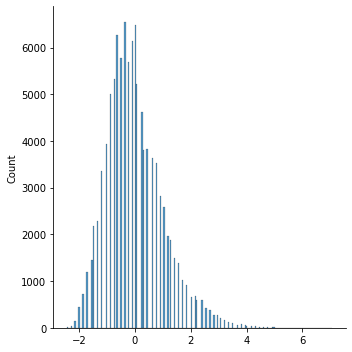

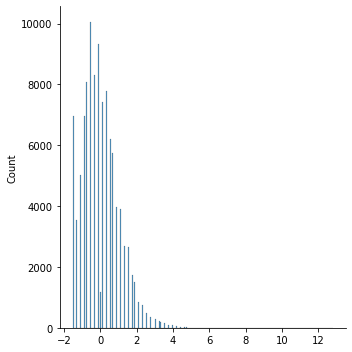

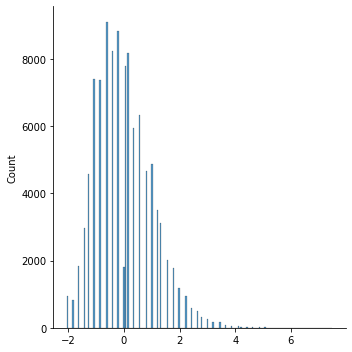

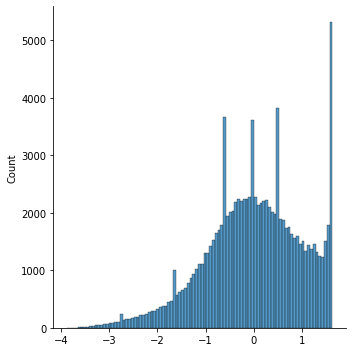

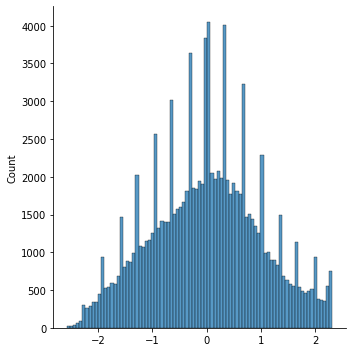

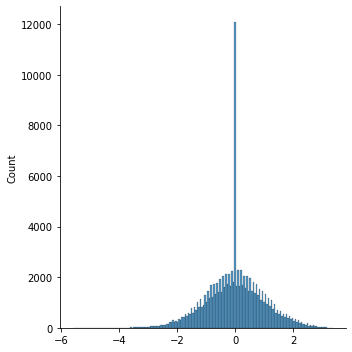

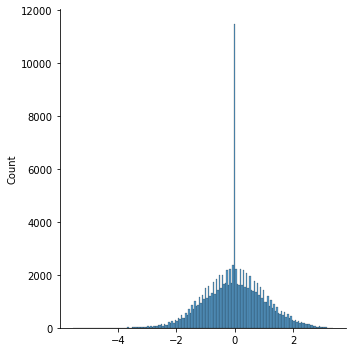

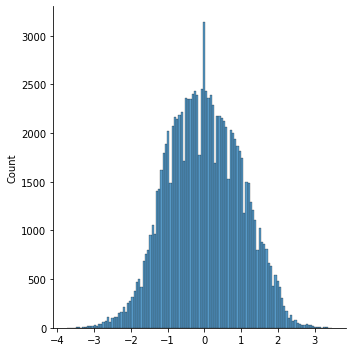

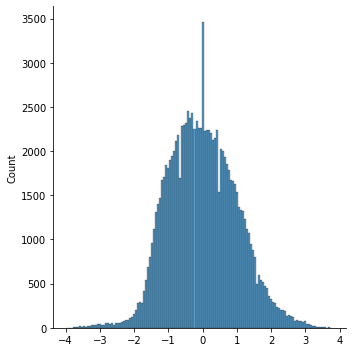

In [38]:
for i in X_train_num.T:
    sns.displot(i)

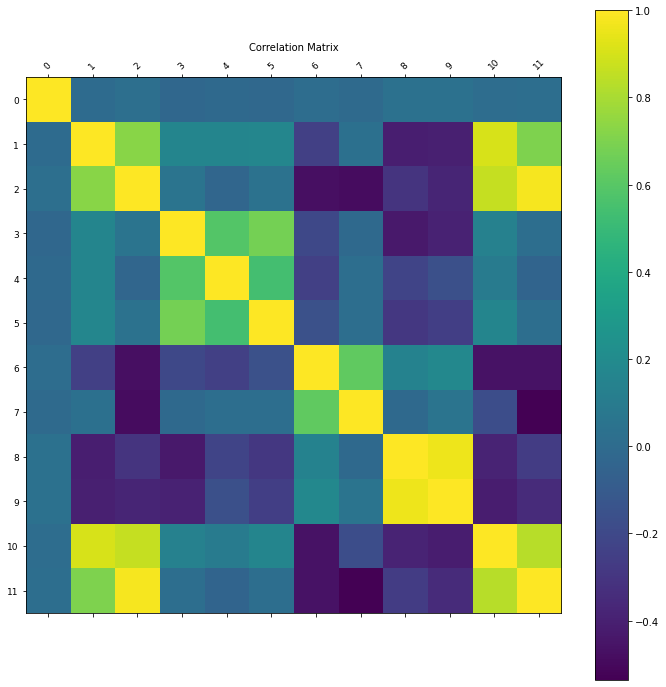

In [77]:
# Построим корреляционную матрицу, вообще из графиков видно, что некоторые величины
# имеют коэффициет корреляции близкий к 1, что говорит о том, что их надо бы убрать

def plot_correlation_matrix(corr_mtrx):
    f = plt.figure(figsize=(12, 12))
    plt.matshow(corr_mtrx, fignum=f.number)
    plt.xticks(range(corr_mtrx.shape[1]), fontsize=9, rotation=45)
    plt.yticks(range(corr_mtrx.shape[1]), fontsize=9)
    cb = plt.colorbar()
    plt.title('Correlation Matrix', fontsize=10)
    

corr_matrix = np.corrcoef(X_train_num, rowvar=False)
plot_correlation_matrix(corr_matrix)

In [78]:
# Реализую функцию, которая удаляет столбцы с сильной корреляцией, то есть где corrcoef > 0.7 
# Если мои действия ошибочны, и я что-то потеряю при таких действиях, сообщите, пожалуйста.

def non_correlated_indices(corr_matrix, corr_coef = 0.7):
    i = 0
    del_ind = []
    for i in range(np.shape(corr_matrix)[0]):
        if i not in del_ind:
              for j in range(len(corr_matrix[i])):
                    if (i != j) and (corr_matrix[i, j] > corr_coef \
                                     or corr_matrix[i, j] < -corr_coef):
                        del_ind.append(j)


    saved_index = [num for num in range(np.shape(corr_matrix)[1])]
    for ind in del_ind:
        saved_index.remove(ind)

    return saved_index
    

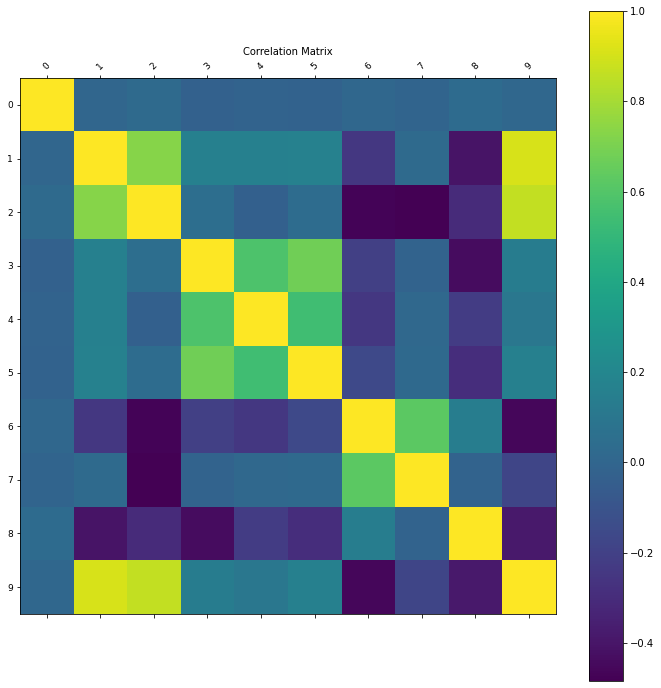

In [82]:
# Полученная корреляционная матрица, в которой корреляционные столбцы удалены

saved_indicies = non_correlated_indices(corr_matrix, corr_coef=0.95)
X_num_compress = X_train_num[:, saved_indicies]
corr_matrix_last = np.corrcoef(X_num_compress, rowvar=False)
plot_correlation_matrix(corr_matrix_last)

In [42]:
# На данном шаге сравниваются результаты логистической регрессии для численных параметров сокращенных и несокращенных
# сокращенных и несокращенных численных парметров (в предыдущем шаге удалял сильнокоррелирующие признаки)


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


grid_LogParam = [
    {"C":[0.5, 0.7, 1], "fit_intercept":[True, False]}
]

grid_search = GridSearchCV(estimator=LogisticRegression(random_state = 42), cv = 3, param_grid = grid_LogParam)
grid_search1 = GridSearchCV(estimator=LogisticRegression(random_state = 42), cv = 3, param_grid = grid_LogParam)

grid_search.fit(X_train_num, y_train)
# best_model = grid_search.best_estimator_
# best_param = grid_search.best_params_
score_full = grid_search.best_score_


grid_search1.fit(X_num_compress, y_train)
score_compress = grid_search1.best_score_

print("score_full is equal = {}".format(score_full))
print("score_compress is equal = {}".format(score_compress))

score_full is equal = 0.8300045009564533
score_compress is equal = 0.8308296763062151


In [43]:
from sklearn.naive_bayes import GaussianNB


NaiveBayes = GaussianNB()

NaiveBayes.fit(X_train_num, y_train)
# best_model = grid_search.best_estimator_
# best_param = grid_search.best_params_
score_full = grid_search.best_score_


NaiveBayes.fit(X_num_compress, y_train)
score_compress = grid_search1.best_score_

print("score_full is equal = {}".format(score_full))
print("score_compress is equal = {}".format(score_compress))



score_full is equal = 0.8300045009564533
score_compress is equal = 0.8308296763062151


In [86]:
# алгоритм соседей не обучает по причине TerminatedWorkerError 
# Надо уменьшить размерность
# К сожалению удаление сильно коррелированных признаков негативно сказалось на модели

from sklearn.neighbors import KNeighborsClassifier

knn_param = [
    {"n_neighbors": [3, 5, 7]}
]

gss_knn = GridSearchCV(estimator=KNeighborsClassifier(weights="distance"), param_grid=knn_param, cv=3,\
                  scoring="roc_auc", n_jobs=-1)

gss_knn.fit(X_train_num, y_train)
score_full = gss_knn.best_score_

gss_knn.fit(X_num_compress, y_train)
score_compress = gss_knn.best_score_
print("score_full is equal = {}".format(score_full))
print("score_compress is equal = {}".format(score_compress))



score_full is equal = 0.7891548130171744
score_compress is equal = 0.7846662580336509


In [44]:
from sklearn.base import BaseEstimator, TransformerMixin
# BaseEstimator, TransformerMixin - нужны для поддержки fit-transform и get_param

class CityType(BaseEstimator, TransformerMixin):    
    def __init__(self, threshhold = 0.7):
    # Данный класс разделяет города на три типа, в зависимости от того, как часто там был дождь 
    # Если отношение содержание p солн дней больше threshold, то город солнечный
    # Если p принадлежит (1- thresh, thresh), то обычный город, и если нет, то дождливый
    # По итогу получим разбиение на 3 группы : солнечный город, дождливый город, обычный город
        self.sun_city = []
        self.rain_city = []
        self.usual_city = []
        self.threshold = threshhold
    
    
    def fit(self, X, y):
        loc_names = np.unique(X.values)
        for name in loc_names:
            city_indicies, = np.where(X.values == name)

            y_work = y_train.iloc[city_indicies]
            
            
            rain_day_amount = np.shape(y_work[y_work == "Yes"])[0]
            
            if rain_day_amount / np.shape(y_work)[0] > self.threshold:
                self.rain_city.append(name)
                
            elif (1 - rain_day_amount / np.shape(y_work)[0]) > self.threshold:
                self.sun_city.append(name)
                
            else:
                self.usual_city.append(name)
        return self
            
        
        
    def transform(self, X, y=None):
        X_work = np.array([1, 1, 1])
        
        for city in X.values:
            if city in self.sun_city:
                X_work = np.vstack((X_work, np.array([1, 0, 0])))
            
            elif city in self.rain_city:
                X_work = np.vstack((X_work, np.array([0, 1, 0])))

            else:
                X_work = np.vstack((X_work, np.array([0, 0, 1])))

        
        return X_work[1:]    

In [45]:
tCity = CityType(threshhold=0.85)
X_city_train = tCity.fit_transform(X_train_cat["Location"], y_train)


In [46]:
import re
# Для разрешения вопроса о направлении ветра, введу координатную плоскость: 
# ось у совмещу с севером, ось х - с востоком. у = [0, 1], x = [1, 0]


def WindDirection(X_work):
    
    X_ch = np.array([0, 0])
    y = np.array([0, 1])
    x = np.array([1, 0])
    
    d = {
        "N": y,
        "S": -y, 
        "E": x,
        "W": -x
    }
    
    X_work = X_work.fillna(0)
    
    
    for word in X_work:
        if word == 0:
            X_ch = np.vstack((X_ch, np.array([0, 0])))
        
        else:    
            vect_1 = np.array([0, 0])
            lst_val = list(word)

            for vector in lst_val:
                vect_1 += d[vector]
            
            vect_1 = vect_1 / np.linalg.norm(vect_1)
            X_ch = np.vstack((X_ch, vect_1))   
        
    
    return X_ch[1:]
    

In [47]:
for i, wind_dir in enumerate(["WindDir9am", "WindDir3pm", "WindGustDir"]):
    data = WindDirection(X_train_cat[wind_dir])
    if i == 0:
        X_train_wind = np.array(data)
    else:
        X_train_wind = np.hstack((X_train_wind, data))
        
    

In [48]:
X_train_cat_last = np.hstack((X_train_wind, X_city_train))

In [203]:
X_train_cat_last

array([[-1.        ,  0.        , -0.89442719, ...,  0.        ,
         0.        ,  1.        ],
       [-0.4472136 ,  0.89442719, -0.89442719, ...,  0.        ,
         0.        ,  1.        ],
       [-1.        ,  0.        , -0.89442719, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.70710678,  0.70710678, -0.70710678, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.70710678, -0.70710678,  0.4472136 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.89442719,  0.4472136 ,  1.        , ...,  0.        ,
         0.        ,  1.        ]])

In [49]:
# Получу 2 типа данных (с сокращенными и полными численными признаками) 

X_train_compress = np.hstack((X_train_cat_last, X_num_compress))
X_train_full = np.hstack((X_train_cat_last, X_train_num))



In [90]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import cross_val_score

class ForwardStepwiseSelection(BaseEstimator, TransformerMixin):
    def __init__(self, estimator=None, score="accuracy", cv=3, eps=0):
        self.estimator = estimator
        self.score = score
        self.cv = cv
        self.best_score = None
        self.eps = eps
        self.best_indicies = np.array([])
        self.best_features = np.array([])
        self.size = None
        
    
    def computation(self, X_use, X_add, y, base_score = 1/2):
        
        
        top_feature = None
        index = None
        
        for i, feature in enumerate(X_add.T):
            feature = feature.reshape((-1, 1))
   
            if np.shape(X_use) != ():
                X_train = np.hstack((X_use, feature))    
            else:
                X_train = feature.reshape((-1, 1))
                
            feat_score = cross_val_score(estimator=self.estimator, X=X_train, y=y,\
                                         cv=self.cv, n_jobs=-1, scoring=self.score)
            if feat_score.mean() > base_score:
                top_feature = feature
                base_score = feat_score.mean()
                index = i
            
        if index != None:
#             self.best_indicies = np.append(self.best_indicies, index) 
            if np.shape(X_use) == ():
                X_useR = top_feature       
            else:
                X_useR = np.hstack((X_use, top_feature))
                
            X_addR = np.delete(X_add, index, axis=1)
      
        else:
            X_useR = X_use
            X_addR = X_add
        
        return X_useR, X_addR, base_score
            
                
    def fit(self, X, y):       
        y = y.reshape((-1, 1))
        score = 1/2
        del_score = 1/2
        X_use = None     
        try:
            X_add = X.values
                  
        except AttributeError:
            X_add = X
            

        while del_score > self.eps:            
            X_use, X_add, base_score = self.computation(X_use, X_add, y, score)
            del_score = base_score - score
            score = base_score
            
            
        
        self.best_score = score        
        for index in range(np.shape(X)[1]):
            for i in X_use.T:
                if np.array_equal(i, X[:, index]):
                    self.best_indicies = np.append(self.best_indicies, index)

                
        
        self.size = np.shape(X_use)

        
    
    def transform(self, X, y=None):
        return X[:, self.best_indicies]
    
        

In [96]:
# В виду того факта, что процедура поиска оптимальных параметров выполняется долго, уменьшу train выборку, чтобы быстрее найти оптимальные параметры одели
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytr, Ytest = train_test_split(X_train_compress, y_train, train_size=0.2)
XFtr, XFtest, YFtr, YFtest = train_test_split(X_train_full, y_train, train_size=0.2)

In [97]:
#Провожу подборку оптимальных признаков (bfc - best compression features )
bcf_log = ForwardStepwiseSelection(estimator = LogisticRegression(), score="roc_auc")
bcf_log.fit(Xtrain, Ytr.values)
score_log = bcf_log.best_score




In [103]:
from sklearn.neighbors import KNeighborsClassifier

bcf_knn = ForwardStepwiseSelection(estimator = KNeighborsClassifier(weights = "distance", n_neighbors=5, n_jobs=-1), score="roc_auc")
bcf_knn.fit(Xtrain, Ytr.values)
score_knn = bcf_knn.best_score

print(score_knn)

0.794964087037996


In [99]:
bcf_bayes = ForwardStepwiseSelection(estimator = GaussianNB(), score="roc_auc")
bcf_bayes.fit(Xtrain, Ytr.values)
score_bayes = bcf_bayes.best_score

In [100]:

print("LogisticRegression score {}".format(score_log))
print("KNN score {}".format(score_knn))
print("GaussianNB score {}".format(score_bayes))


LogisticRegression score 0.8411550269223712
KNN score 0.8411550269223712
GaussianNB score 0.8319475223816868


In [101]:
#Провожу подборку оптимальных признаков (bff - best full features )

bff_log = ForwardStepwiseSelection(estimator = LogisticRegression(random_state=42), score="roc_auc")
bff_log.fit(XFtr, YFtr.values)
score_log = bcf_log.best_score


In [105]:
from sklearn.model_selection import train_test_split

bff_knn = ForwardStepwiseSelection(estimator = KNeighborsClassifier(weights="distance"), score="roc_auc")
bff_knn.fit(XFtr, YFtr.values)
score_knn = bff_knn.best_score


In [106]:
bff_bayes = ForwardStepwiseSelection(estimator = GaussianNB(), score="roc_auc")
bff_bayes.fit(XFtr, YFtr.values)
score_bayes = bff_bayes.best_score


In [ ]:
del Xtrain, Xtest, Ytr, Ytest, XFtr, XFtest, YFtr, YFtest

In [110]:
print("LogisticRegression score {}".format(score_log))
print("KNN score {}".format(score_knn))
print("GaussianNB score {}".format(score_bayes))


LogisticRegression score 0.8411550269223712
KNN score 0.8019153528076334
GaussianNB score 0.8349394582700428


Таким образом заметно - удаление сильно коррелированных признаков позитивно сказалось на алгоритме  KNN, но немного ухудшило модель наивного базиса (что странно)
Логистическая регрессия не изменилась при изъятии сильнокоррелирующих признаков (это может быть связано с тем, что лог рег может обнулить вклад нек признаков, задав значение веса = 0)

In [108]:
print("best features for log {}".format(bcf_log.best_indicies))
print("best features for knn {}".format(bcf_knn.best_indicies))
print("best features for bayes {}".format(bcf_bayes.best_indicies))



best features for log [ 0.  1.  2.  3.  5.  6. 10. 11. 12. 13. 14. 15. 16.]
best features for knn [ 0.  3.  4.  9. 10. 11. 15. 16.]
best features for bayes [ 1.  3.  9. 11. 15. 16.]


In [109]:
print("best features for log {}".format(bff_log.best_indicies))
print("best features for knn {}".format(bcf_knn.best_indicies))
print("best features for bayes {}".format(bff_bayes.best_indicies))



best features for log [ 0.  1.  2.  5.  6.  9. 10. 11. 12. 14. 15. 16. 17. 18. 20.]
best features for knn [ 0.  3.  4.  9. 10. 11. 15. 16.]
best features for bayes [ 2.  3. 12. 16. 18. 19.]


In [111]:
best_log_ind = bcf_log.best_indicies.astype(int)
best_knn_ind = bcf_knn.best_indicies.astype(int)
best_bayes_ind = bcf_bayes.best_indicies.astype(int)



print("LogisticRegression best indicies {}".format(best_log_ind))
print("KNN best indicies {}".format(best_knn_ind))
print("GaussianNB best indicies {}".format(best_bayes_ind))

LogisticRegression best indicies [ 0  1  2  3  5  6 10 11 12 13 14 15 16]
KNN best indicies [ 0  3  4  9 10 11 15 16]
GaussianNB best indicies [ 1  3  9 11 15 16]


In [112]:
log_param = [
    {"intercept_scaling":[0.3, 0.4, 0.45, 0.5], "C":[0.1, 0.15, 0.2, 0.25, 0.3]}
]
gscv_lg = GridSearchCV(estimator=LogisticRegression(), cv=3, param_grid = log_param, \
                      scoring="roc_auc", refit=True)
gscv_lg.fit(X_train_compress[:, best_log_ind], y_train)


GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid=[{'C': [0.1, 0.15, 0.2, 0.25, 0.3],
                          'intercept_scaling': [0.3, 0.4, 0.45, 0.5]}],
             scoring='roc_auc')

In [113]:
bayes = GaussianNB()
bayes.fit(X_train_compress[:, best_bayes_ind], y_train)

GaussianNB()

In [114]:
knn_param = [
    {"n_neighbors": [3, 5, 7]}
]

gscv_knn = GridSearchCV(estimator=KNeighborsClassifier(weights="distance"), param_grid=knn_param, cv=3,\
                  scoring="roc_auc", n_jobs=-1)

gscv_knn.fit(X_train_compress[:, best_knn_ind], y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(weights='distance'),
             n_jobs=-1, param_grid=[{'n_neighbors': [3, 5, 7]}],
             scoring='roc_auc')

Приведение тестовой выборки к виду тренировочной

In [115]:
X_work = X_test.copy()
X_test.loc[:, "Date"] = date_to_DayFromStart(X_work, "Date")
del X_work

TypeError: fromisoformat: argument must be str

In [116]:
X_test_num = X_test.loc[:, X_test.dtypes == "float64"]
X_test_cat = X_test.loc[:, X_test.dtypes == "object"]

X_test_num = num_pipeline.fit_transform(X_test_num)


In [117]:
X_num_compress_test = X_test_num[:, saved_indicies]


In [118]:
tCity = CityType(threshhold=0.85)
X_city_test = tCity.transform(X_test_cat["Location"])


In [119]:
for i, wind_dir in enumerate(["WindDir9am", "WindDir3pm", "WindGustDir"]):
    data = WindDirection(X_test_cat[wind_dir])
    if i == 0:
        X_test_wind = np.array(data)
    else:
        X_test_wind = np.hstack((X_test_wind, data))
        
    

In [120]:
X_test_cat_last = np.hstack((X_test_wind, X_city_test))

In [121]:
X_test_compress = np.hstack((X_test_cat_last, X_num_compress_test))
X_test_full = np.hstack((X_test_cat_last, X_test_num))



Оценка Моделей

In [122]:
from sklearn.metrics import roc_auc_score

y_pred_log = gscv_lg.predict(X_test_compress[:, best_log_ind])
y_pred_bayes = bayes.predict(X_test_compress[:, best_bayes_ind])
y_pred_knn = gscv_knn.predict(X_test_compress[:, best_knn_ind])

In [126]:
gscv_lg = roc_auc_score(y_test, y_pred_log)
score_knn = roc_auc_score(y_test, y_pred_knn)
score_bayes = roc_auc_score(y_test, y_pred_bayes)



print("Roc Auc score for logistic regression is equal {}".format(score_log))
print("Roc Auc score for knn is equal {}".format(score_knn))
print("Roc Auc score for Naive BayesClassifier is equal {}".format(score_bayes))

Roc Auc score for logistic regression is equal 0.8411550269223712
Roc Auc score for knn is equal 0.5193331757630657
Roc Auc score for Naive BayesClassifier is equal 0.7493351141898408


In [ ]:
knn_param = [
    {"n_neighbors": [3, 5, 7]}
]

gscv_knn = GridSearchCV(estimator=KNeighborsClassifier(weights="distance"), param_grid=knn_param, cv=3,\
                  scoring="roc_auc", n_jobs=-1)

gscv_knn.fit(X_train_full, y_train)

In [124]:
log_param = [
    {"intercept_scaling":[0.3, 0.4, 0.45, 0.5], "C":[0.1, 0.15, 0.2, 0.25, 0.3]}
]
gscv_lg = GridSearchCV(estimator=LogisticRegression(), cv=3, param_grid = log_param, \
                      scoring="roc_auc", refit=True)
gscv_lg.fit(X_train_full, y_train)


bayes = GaussianNB()
bayes.fit(X_train_full, y_train)

GaussianNB()

In [125]:
y_pred_log = gscv_lg.predict(X_test_full)
y_pred_bayes = bayes.predict(X_test_full)
gscv_lg = roc_auc_score(y_test, y_pred_log)
score_knn = roc_auc_score(y_test, y_pred_knn)
score_bayes = roc_auc_score(y_test, y_pred_bayes)
print("Roc Auc score for logistic regression is equal {}".format(score_log))
print("Roc Auc score for knn is equal {}".format(score_knn))
print("Roc Auc score for Naive BayesClassifier is equal {}".format(score_bayes))

Roc Auc score for logistic regression is equal 0.8411550269223712
Roc Auc score for knn is equal 0.5193331757630657
Roc Auc score for Naive BayesClassifier is equal 0.7493351141898408


Результаты показывают, что на логистическую регрессию не влияет наличие лишних признаков, так как она их вклад обнуляет. Единственная особенность время обчения увеличивается.

Наивный байесовский классификатор - вообще говоря зависит от доп признаков, но в рассмотренном задании улучшение модели не проиошло. Модель ближайших соседей работает хуже обычный предсказатель (отсутствие осадков)

Самым затратнным по времени оказался KNN, затем logreg и bayes. KNN не очень эффективен на пространствах больших размерностей, также, вероятнее всего, причина его неэффективности связана с неправильным подходом при заполнении пропущенных данных (кол-во пропущенных данных около 10%). Вероятно эта же причина объясняет невысокую точность оставшихся двух алгоритмов.

